## Problem 2
#### (a)

In [2]:
using Plots

In [ ]:
f(x) = exp(x^2)

x_values = -2:0.01:2

# Compute y values
y_values = f.(x_values)

# Create the plot
plot(x_values, y_values, label="f(x) = e^(x^2)", xlabel="x", ylabel="f(x)", lw=2)
     

In [ ]:
f(x) = exp(-x^2)

x_values = -2:0.01:2

# Compute y values
y_values = f.(x_values)

# Create the plot
plot(x_values, y_values, xlabel="x", ylabel="f(x)", label="f(x) = e^(-x^2)", lw=2)

## Problem 4
#### (a)

In [ ]:
# Find Constant monthly payment p
L = 400000

r1=0.05/12   
n1=15*12
d1=(1+r1)^n1 # d for actual interest rate
p1 = (L*r1*d1)/(d1-1)

r2=0.06/12
n2=20*12
d2=(1+r2)^n2
p2=(L*r2*d2)/(d2-1)

r3=0.07/12
n3=30*12
d3=(1+r3)^n3
p3=(L*r3*d3)/(d3-1)

println("Monthly payments for the three loan options are: \$$(round(p1, digits=2)), \$$(round(p2, digits=2)), \$$(round(p3, digits=2)).")

# Total Payment
t1 = p1 * n1
t2 = p2 * n2
t3 = p3 * n3
println("Total payments for the three loan options are: \$$(round(t1, digits=2)), \$$(round(t2, digits=2)), \$$(round(t3, digits=2)).")

#### (f)

In [91]:
using JuMP
using Gurobi

model = Model(Gurobi.Optimizer)

L = 400000

# Decision Variables
@variable(model, y1[0:360] >= 0)  
@variable(model, y2[0:360] >= 0)  
@variable(model, y3[0:360] >= 0)  

@variable(model, x1[1:360] >= 0)  
@variable(model, x2[1:360] >= 0)  
@variable(model, x3[1:360] >= 0)  

@variable(model, p >= 0)  

# Initial loan allocation (y_{i,0})
@constraint(model, y1[0] + y2[0] + y3[0] == L)

# payoff constraints
for t in 1:180
    @constraint(model, y1[t] == y1[t-1] * (1 + (0.05/12)) - x1[t])
end
@constraint(model, y1[180] == 0)
@constraint(model, x1[181:360] == 0)

for t in 1:240
    @constraint(model, y2[t] == y2[t-1] * (1 + (0.06/12)) - x2[t])
end
@constraint(model, y2[240] == 0)
@constraint(model, x2[241:360] == 0)

for t in 1:360
    @constraint(model, y3[t] == y3[t-1] * (1 + (0.07/12)) - x3[t])
end
@constraint(model, y3[360] == 0)

# Total monthly payment constraint
for t in 1:360
    @constraint(model, x1[t] + x2[t] + x3[t] == p)
end

# for question e, comment out the following block of constraint
# Minimum monthly payment constraint (at least $100 on each loan)
for t in 1:180
    @constraint(model, x1[t] >= 100)
end
for t in 1:240
    @constraint(model, x2[t] >= 100)
end
for t in 1:360
    @constraint(model, x3[t] >= 100)
end


# Objective: Minimize the total monthly payment p
@objective(model, Min, p)

# Solve the model
optimize!(model)

# Check the solution
if termination_status(model) == MOI.OPTIMAL
    println("Optimal total monthly payment: ", value(p))
    println("Initial allocation for loan 1: ", value(y1[0]))
    println("Initial allocation for loan 2: ", value(y2[0]))
    println("Initial allocation for loan 3: ", value(y3[0]))
else
    println("The problem was not solved to optimality.")
end

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-19
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 23.6.0 23G93)

CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2224 rows, 2164 columns and 4866 nonzeros
Model fingerprint: 0xb2af874b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 4e+05]
Presolve removed 1983 rows and 1503 columns
Presolve time: 0.00s
Presolved: 241 rows, 661 columns, 1561 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9969900e+02   1.105398e+04   0.000000e+00      0s
       1    2.3845552e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.384555180e+03

User-callback calls 61, time in user-cal

#### (v) Plot

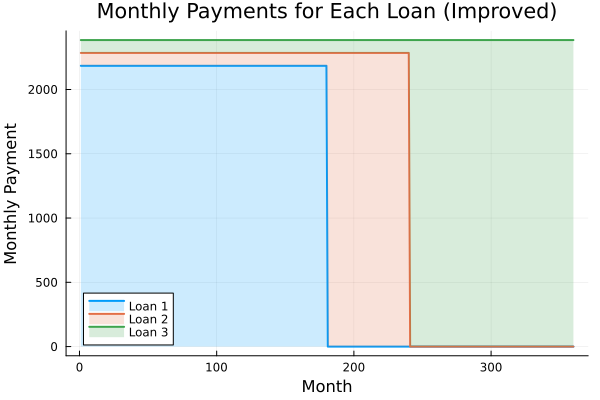

In [87]:
using Plots

# Create the time axis
months = 1:360

# Concatenate the payment data (adjust as needed)
payments1 = [value(x1[t]) for t in months]
payments2 = [value(x2[t]) for t in months]
payments3 = [value(x3[t]) for t in months]

# Stacked area plot showing the change in monthly payments over time
areaplot(months, [payments1 payments2 payments3],
         labels=["Loan 1" "Loan 2" "Loan 3"],
         xlabel="Month", ylabel="Monthly Payment",
         title="Monthly Payments for Each Loan",
         lw=2, fillalpha=0.2)

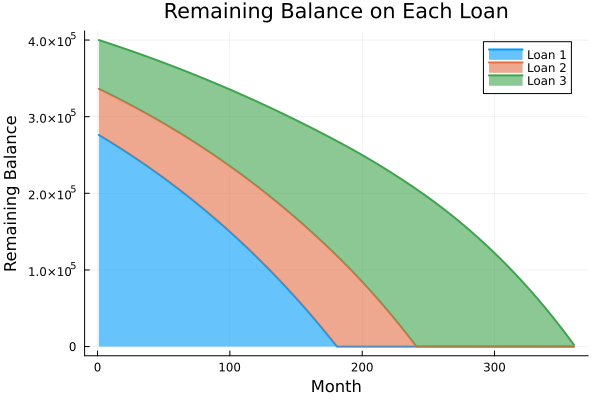

In [80]:
# Extract the values for remaining balance after solving the model
# Here we assume that y1, y2, y3 have been populated from the optimization results
balance1 = [value(y1[t]) for t in 0:180]
balance2 = [value(y2[t]) for t in 0:240]
balance3 = [value(y3[t]) for t in 0:360]

# Extend balance data with zeros for loans that end earlier
balance1_extended = vcat(balance1, zeros(360 - length(balance1)))
balance2_extended = vcat(balance2, zeros(360 - length(balance2)))
balance3_extended = balance3  # Loan 3 already has 360 months

# Stacked area plot for remaining balances
areaplot(months, [balance1_extended balance2_extended balance3_extended],
         labels=["Loan 1" "Loan 2" "Loan 3"],
         xlabel="Month", ylabel="Remaining Balance",
         title="Remaining Balance on Each Loan",
         lw=2, fillalpha=0.6)
